# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [3]:
!pip install xgboost

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [77]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


#### 1. Data Cleaning, Transformation

In [34]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df['Test Results'] = le.fit_transform(df['Test Results'])
df['Medication'] = le.fit_transform(df["Medication"])

df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Doctor','Room Number'], axis=1, inplace=True)

df.head()

,Age,Gender,Blood Type,Medical Condition,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,81,0,7,3,Wallace-Hamilton,Medicare,37490.983364,Elective,0,1
1,35,1,6,1,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2,2
2,61,1,5,5,Walton LLC,Medicare,36874.896997,Emergency,2,2
3,49,1,5,1,Garcia Ltd,Medicare,23303.322092,Urgent,4,0
4,51,1,7,0,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,3,2


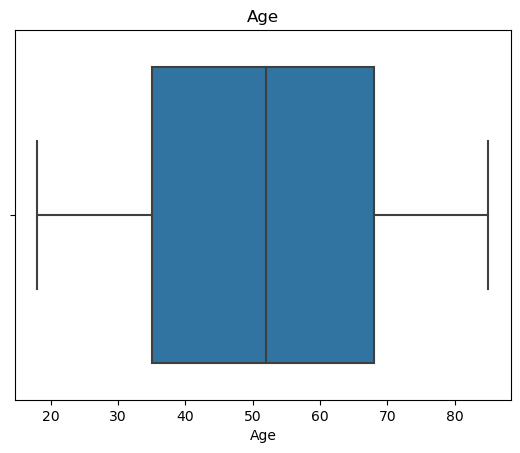

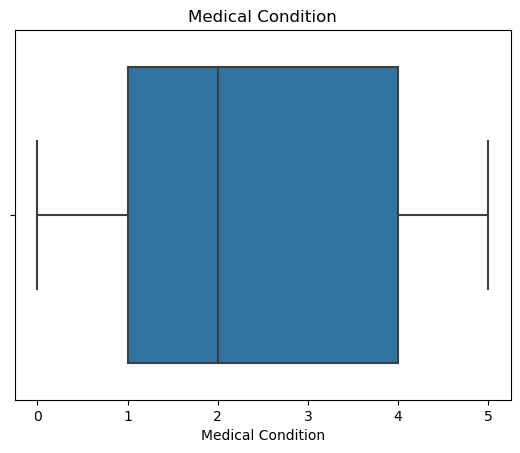

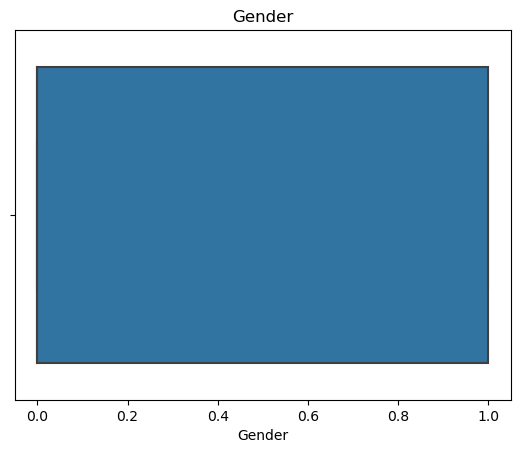

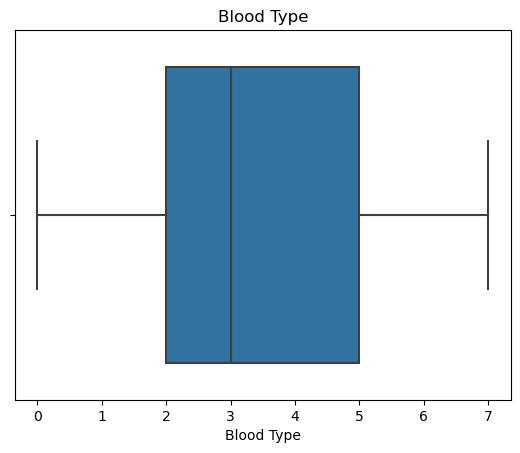

In [66]:
columns_to_plot = ['Age', 'Medical Condition', 'Gender', 'Blood Type']

for col in columns_to_plot:
    plt.title(col)
    sns.boxplot(x=col, data=df)
    plt.show()

In [37]:
df.describe()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Medication,Test Results
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,51.452200,0.492500,3.501100,2.487500,25516.806778,2.02080,0.981100
std,19.588974,0.499969,2.286071,1.701803,14067.292709,1.41858,0.819762
min,18.000000,0.000000,0.000000,0.000000,1000.180837,0.00000,0.000000
25%,35.000000,0.000000,2.000000,1.000000,13506.523967,1.00000,0.000000
50%,52.000000,0.000000,3.000000,2.000000,25258.112566,2.00000,1.000000
75%,68.000000,1.000000,5.000000,4.000000,37733.913727,3.00000,2.000000
max,85.000000,1.000000,7.000000,5.000000,49995.902283,4.00000,2.000000


#### 2. Visualization (EDA)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Blood Type'}>],
       [<AxesSubplot:title={'center':'Medical Condition'}>,
        <AxesSubplot:title={'center':'Billing Amount'}>,
        <AxesSubplot:title={'center':'Medication'}>],
       [<AxesSubplot:title={'center':'Test Results'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

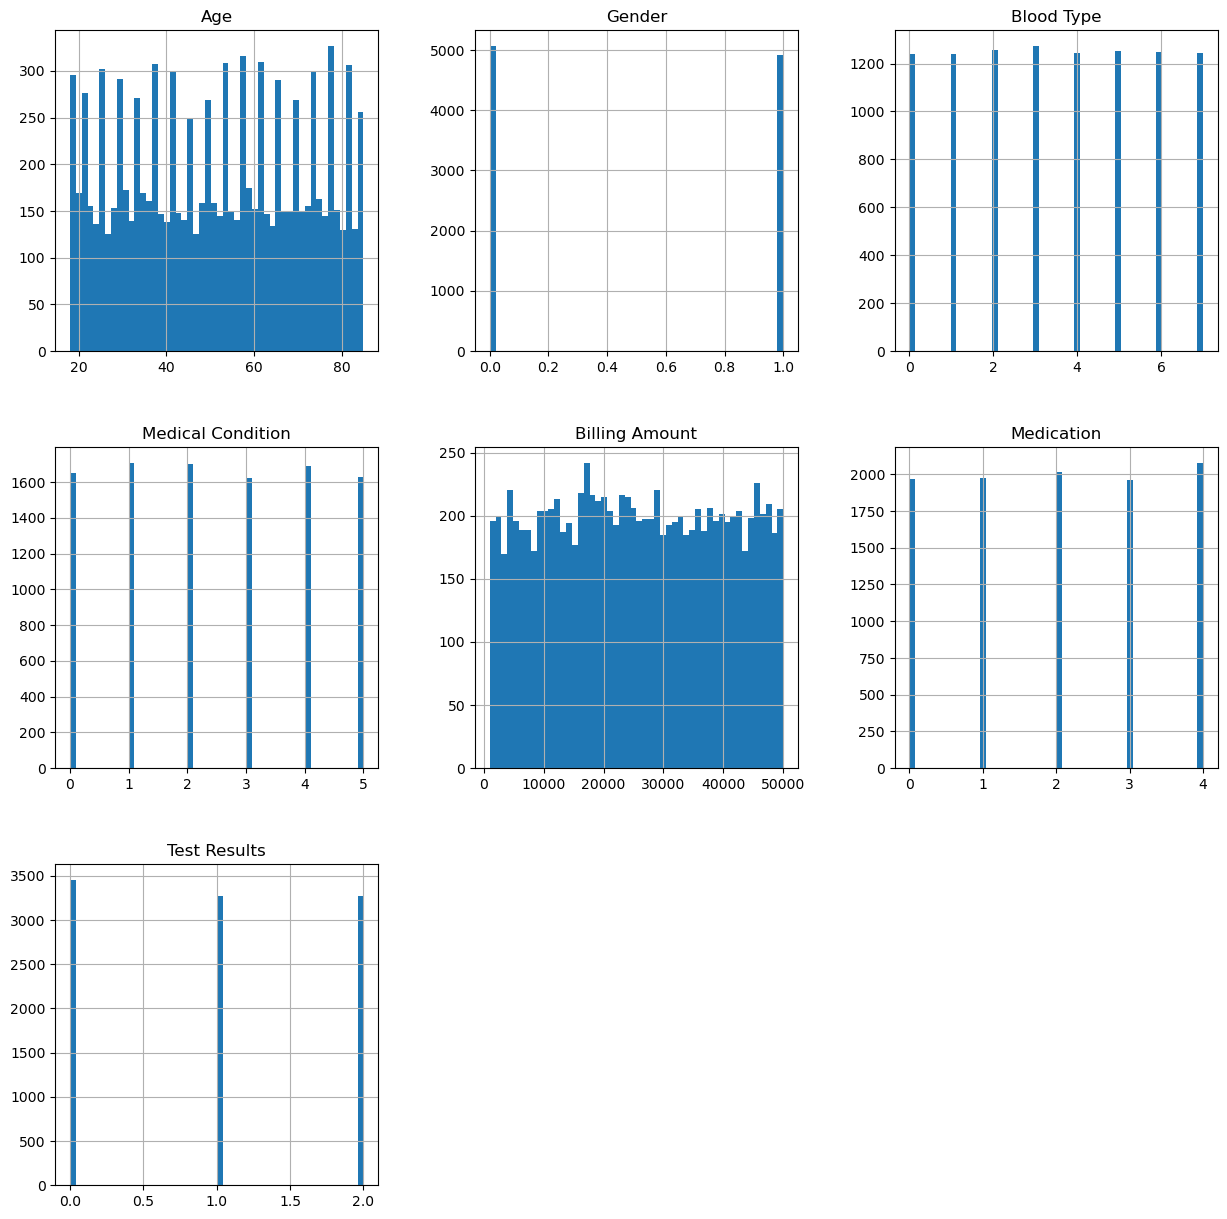

In [20]:
df.hist(bins=50, figsize=(15,15))

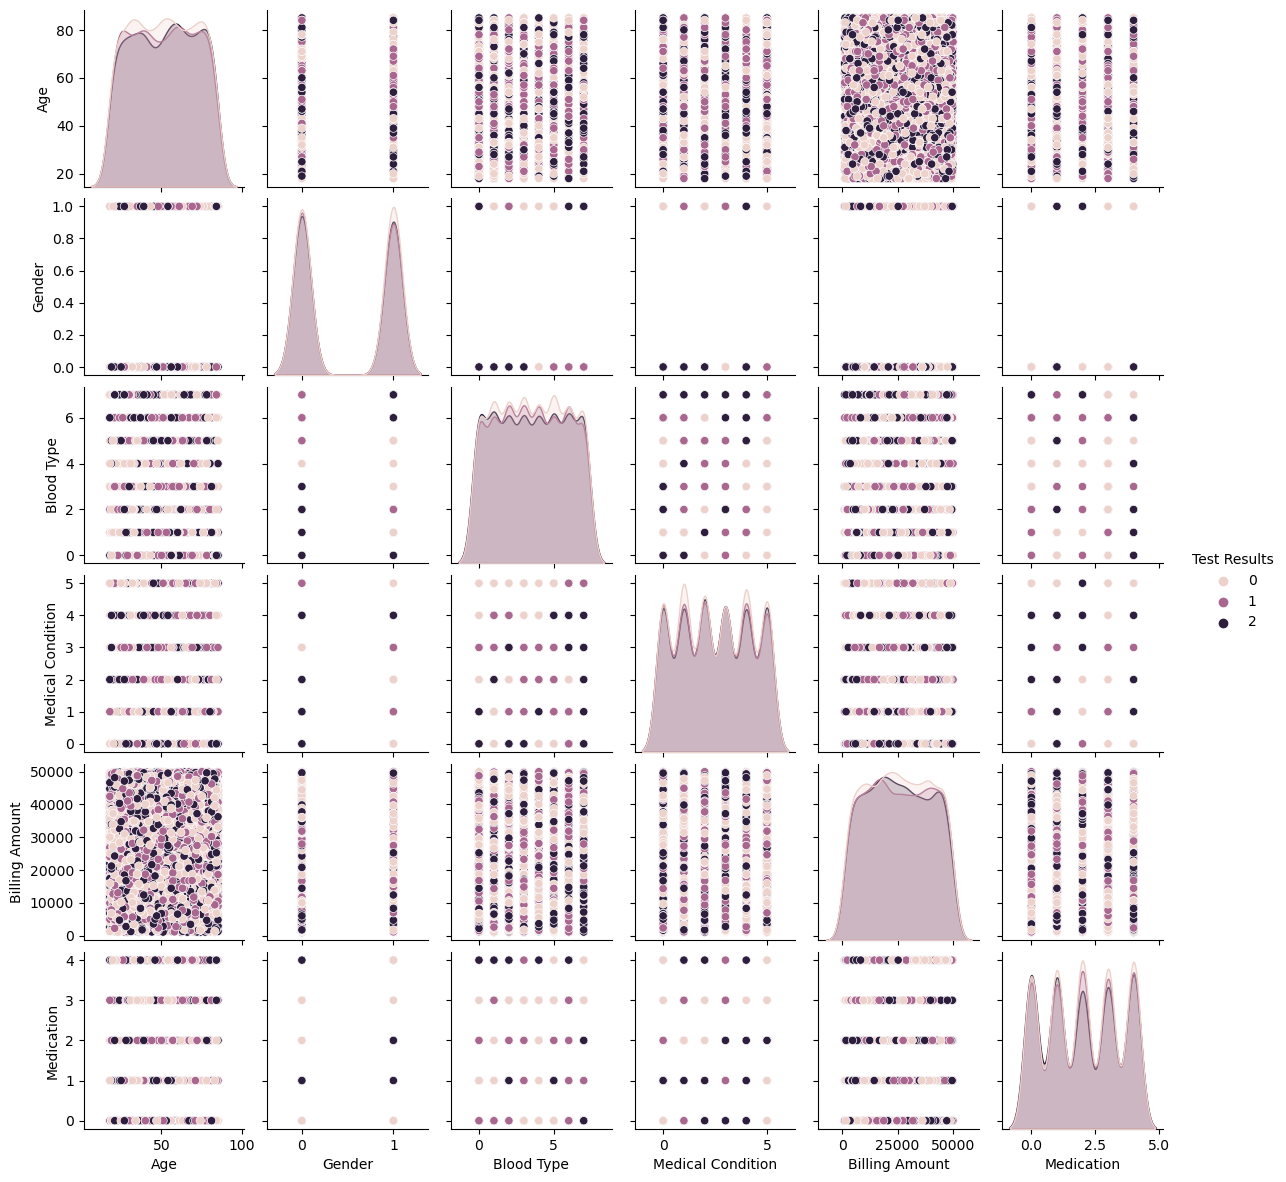

In [39]:
sns.pairplot(df, hue='Test Results', height=2)
plt.show()

<AxesSubplot:>

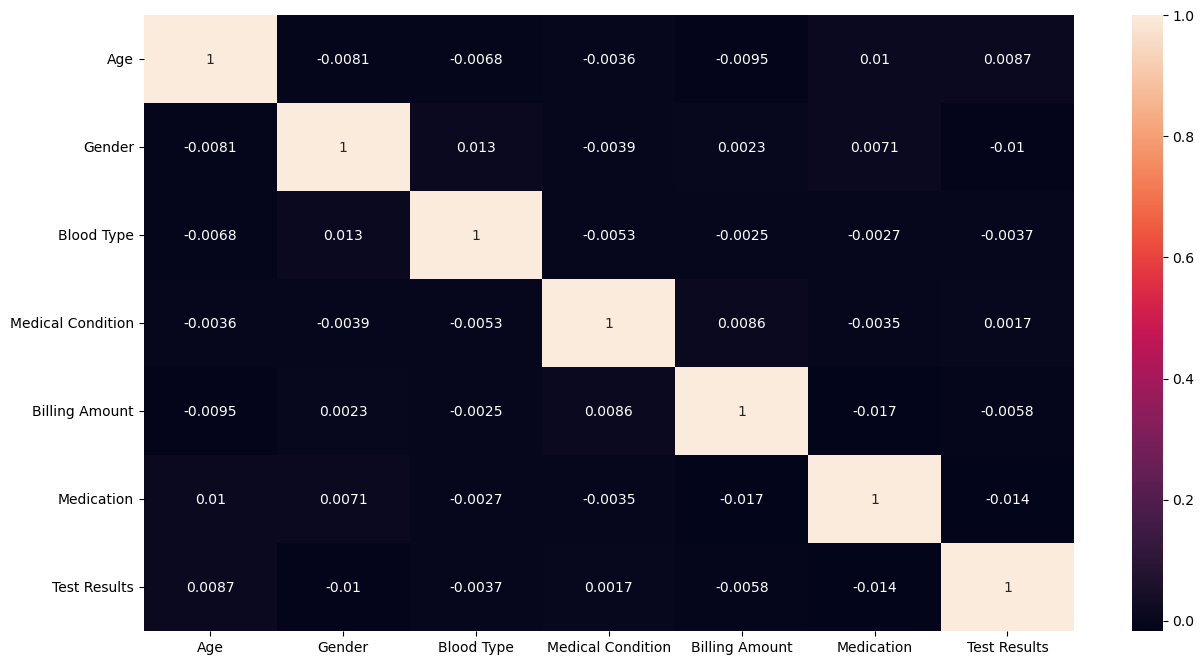

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

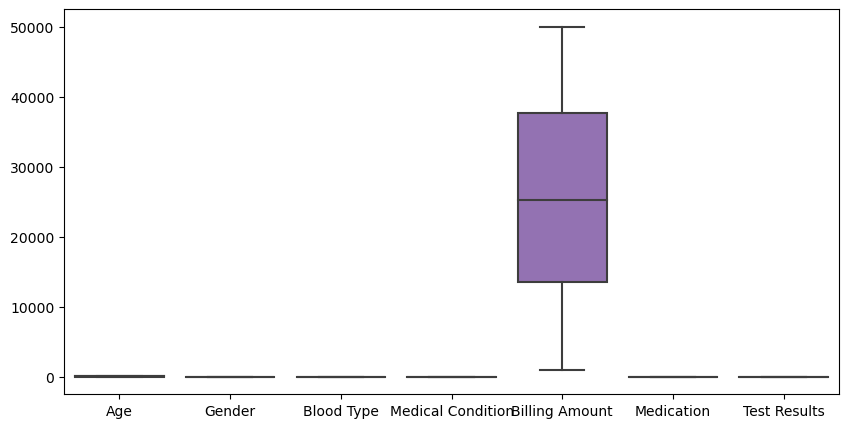

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.show()

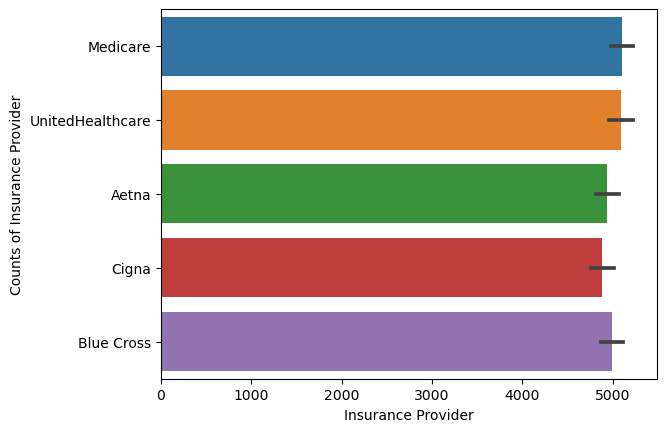

In [62]:
sns.barplot(x=df.index, y=df['Insurance Provider']);
plt.xlabel('Insurance Provider')
plt.ylabel('Counts of Insurance Provider')
plt.show()

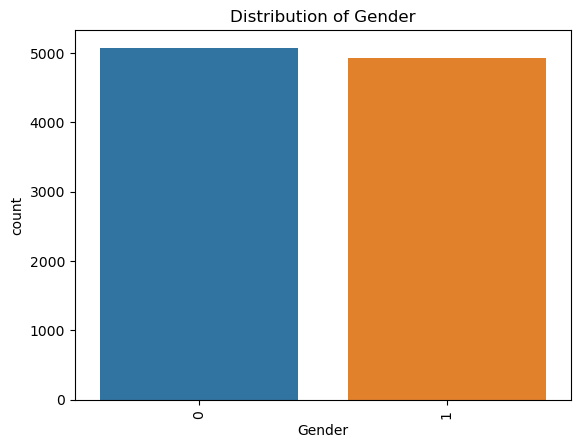

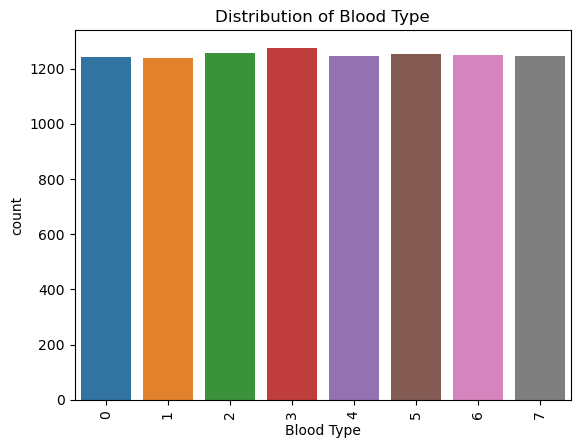

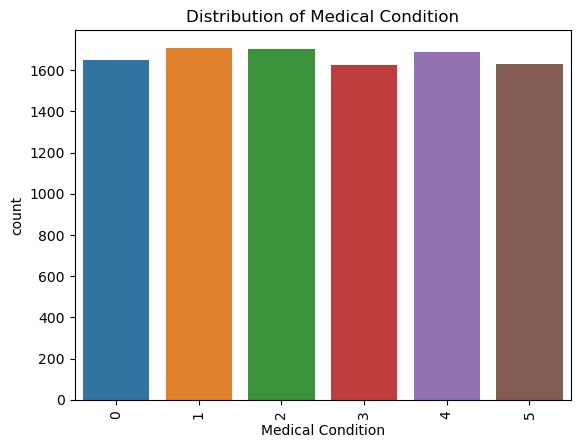

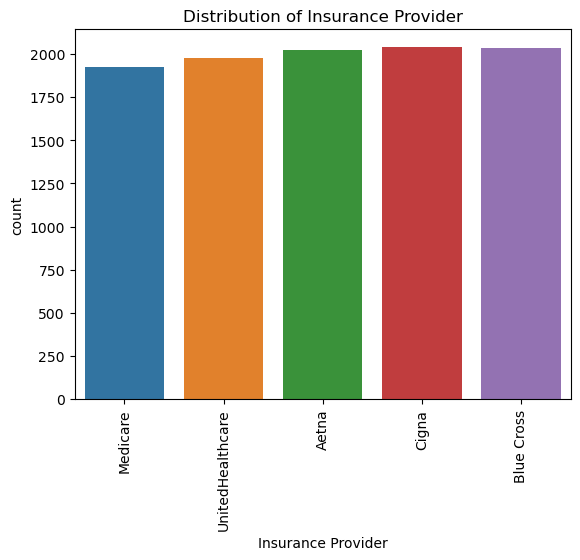

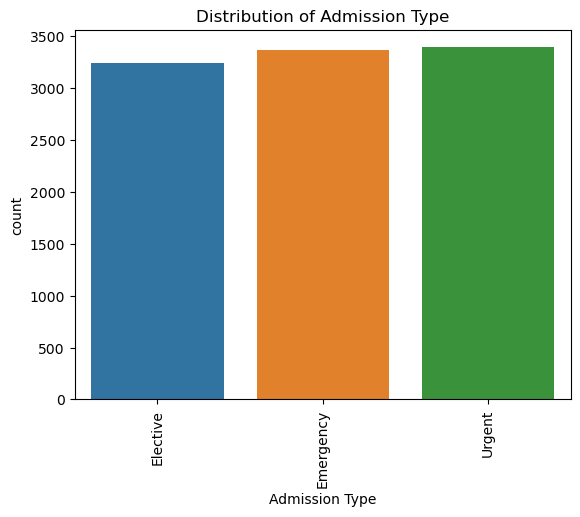

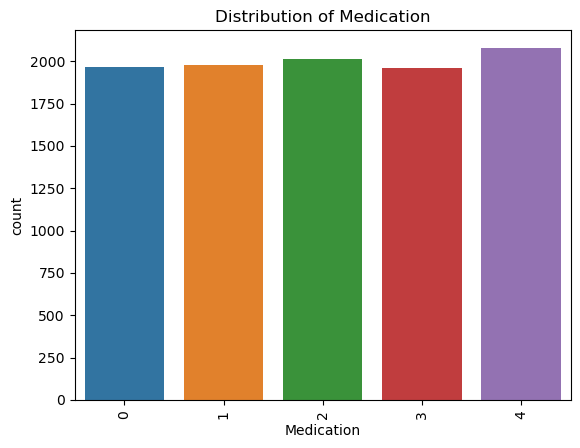

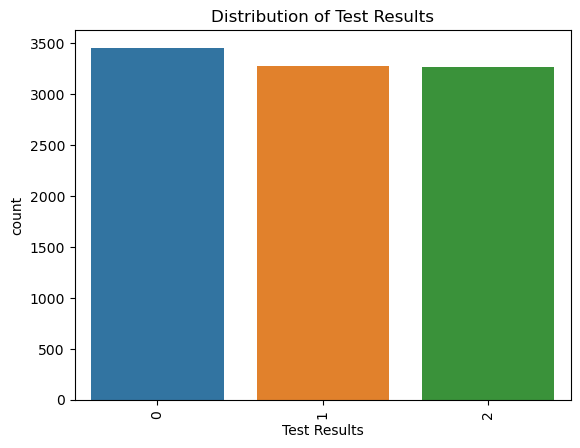

In [55]:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

#### 3. Use at least one machine learning techniques (Regression, Classification, Clustering)

In [107]:
linregress = LinearRegression()
linregress.fit(X_train, y_train)

LinearRegression()

In [108]:
X_train_sm = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


                            OLS Regression Results                            
Dep. Variable:         Billing Amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                nan
Time:                        21:38:46   Log-Likelihood:             1.3874e+05
No. Observations:                8000   AIC:                        -2.615e+05
Df Residuals:                       0   BIC:                        -2.056e+05
Df Model:                        7999                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [94]:
X_reg = df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Billing Amount'], axis=1)
y_reg = df['Billing Amount']

X_reg = pd.get_dummies(X_reg)

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn_reg = knn_reg.predict(X_test)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

print("\nK-Nearest Neighbors Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn_reg))
print("R-squared:", r2_score(y_test, y_pred_knn_reg))

Linear Regression:
Mean Squared Error: 171092998.69216698
R-squared: 0.14403379177752318

K-Nearest Neighbors Regression:
Mean Squared Error: 225542434.6303846
R-squared: -0.12837289684300024


In [89]:
X_reg = df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Billing Amount'], axis=1)
y_reg = df['Billing Amount']

X_reg = pd.get_dummies(X_reg)

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

reg_score = r2_score(y_test, y_pred)
print("Regression Model Score:", reg_score)

Regression Model Score: 0.14403379177752318


In [79]:
X_clf = df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Medical Condition'], axis=1)
y_clf = df['Medical Condition']

X_clf = pd.get_dummies(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier()
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

clf_score = accuracy_score(y_test, y_pred)
print("Classification Model Score:", clf_score)

Classification Model Score: 0.1695


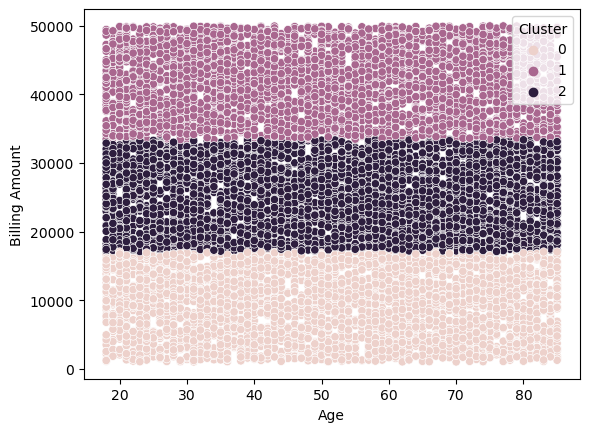

In [87]:
X_cluster = df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Gender'], axis=1)

X_cluster = pd.get_dummies(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

sns.scatterplot(x='Age', y='Billing Amount', hue='Cluster', data=df)
plt.show()

#### 4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

In [96]:
X_reg = df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Medical Condition'], axis=1)
y_reg = df['Medical Condition']

X_reg = pd.get_dummies(X_reg)

le = LabelEncoder()
y_reg = le.fit_transform(y_reg)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

xgb_reg_model = XGBRegressor()
xgb_reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = xgb_reg_model.predict(X_test_reg)

y_pred_labels = le.inverse_transform([round(pred) for pred in y_pred_reg])

classification_score = accuracy_score(y_test_reg, y_pred_labels)
print("XGBoost Classification Score:", classification_score)

XGBoost Classification Score: 0.0


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy XGBoost: {accuracy}')

In [ ]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(X_train_scaled, method='ward')

plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distances')
plt.show()